In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#read ipl.csv file and print first 5 records
df = pd.read_csv("ipl data.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#check total number of columns,entries note down your findings

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

# Findings:-
There are 18 columns in dataset.
Columns city, winner, player_of_match, umpire1, umpire2, umpire3 contains null values.
Datatype of each column is correct.


In [4]:
# find null values 
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
#drop umpire3 column as it contains more than 75% of null values


df.drop("umpire3",axis=1,inplace=True)


In [6]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column

df.dropna(subset=['city',"winner","player_of_match",'umpire1','umpire2'],axis=0,inplace=True)


<AxesSubplot:xlabel='count', ylabel='city'>

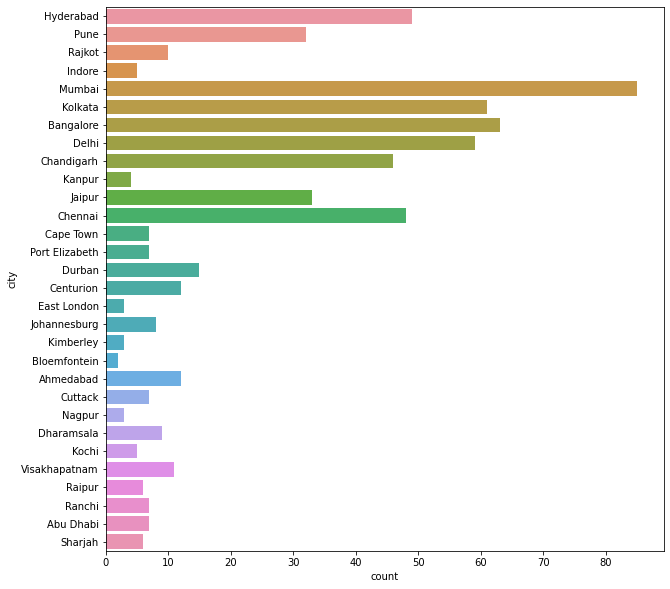

In [36]:
#which city hosted most number of matches?
df["city"].value_counts()

#draw bar plot and write down your insights
plt.figure(figsize=(10,10))
sns.countplot(y="city",data=df)




# Insights
From above chart we can conclude that the city , Mumbai is ranking at the top for the most hosted cities. It has covered approximately 88 matches from the data observed. The second rank goes to Bangalore and the third goes to Kolkata followed by Delhi and Hyderabad

In [8]:
#find all venue of mumbai city

df[df["city"]=="Mumbai"].venue.value_counts()


Wankhede Stadium              57
Dr DY Patil Sports Academy    17
Brabourne Stadium             11
Name: venue, dtype: int64

<AxesSubplot:xlabel='count', ylabel='venue'>

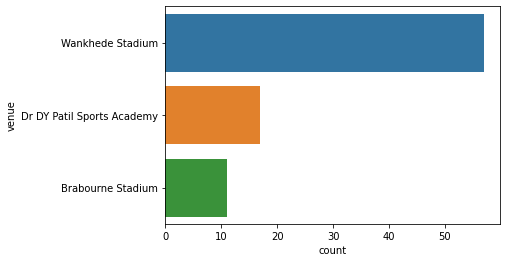

In [9]:
#now compare in which venue of mumbai most number of matches played (draw bar plot and  write down insights)

sns.countplot(y=df[df["city"]=="Mumbai"].venue,data=df)


# Insights
Most number of matches were played in Wankhede Stadium followed by Dr DY Patil Sports Academy and Brabourne Stadium

In [10]:
#what is the preferred choice after winning a toss in mumbai

df[df['city']=="Mumbai"].toss_decision.value_counts()


field    51
bat      34
Name: toss_decision, dtype: int64

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

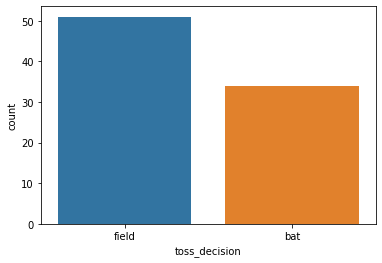

In [11]:
#graphical representation of above question

sns.countplot(df[df['city']=="Mumbai"].toss_decision,data=df)

In [12]:
#which team won most number of toss :-Mumbai Indians
df["toss_winner"].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

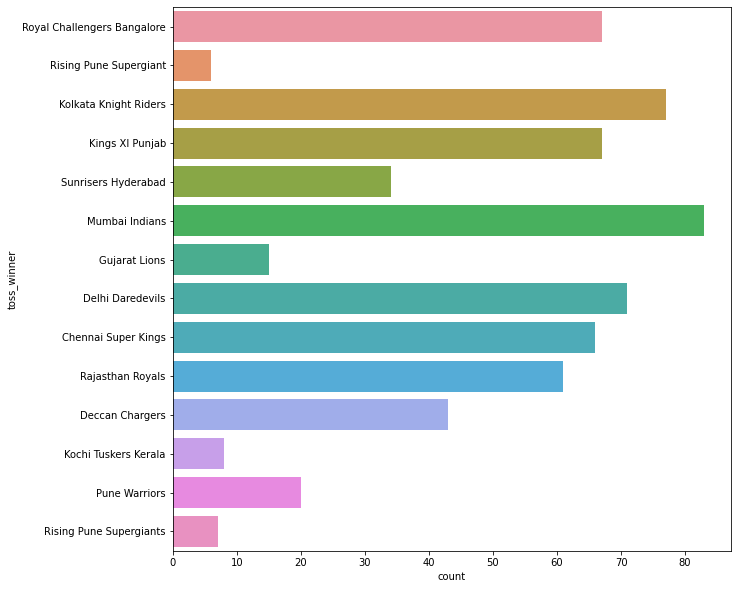

In [35]:
#show graphical representation of above question

plt.figure(figsize=(10,10))
sns.countplot(y=df["toss_winner"],data=df)


In [14]:
#find what mumbai indians preferred after winning a toss?

df[df["toss_winner"]=="Mumbai Indians"].toss_decision.value_counts()

field    44
bat      39
Name: toss_decision, dtype: int64

In [15]:
#head to head winning count of Mumbai Indians vs Chennai Super Kings

df[['winner']][(df['team1']=="Mumbai Indians") & (df['team2']=="Chennai Super Kings") | (df['team1']=="Chennai Super Kings") & (df['team2']=='Mumbai Indians')].value_counts()

winner             
Mumbai Indians         12
Chennai Super Kings     9
dtype: int64

In [16]:
#Which team won most of the matches in mumbai?

df[df['city']=="Mumbai"].winner.value_counts()

Mumbai Indians                 45
Chennai Super Kings             8
Kings XI Punjab                 5
Royal Challengers Bangalore     5
Rajasthan Royals                5
Deccan Chargers                 3
Kolkata Knight Riders           3
Pune Warriors                   3
Rising Pune Supergiant          2
Delhi Daredevils                2
Kochi Tuskers Kerala            1
Sunrisers Hyderabad             1
Rising Pune Supergiants         1
Gujarat Lions                   1
Name: winner, dtype: int64

In [30]:
#how many times each team won the toss and won the match in mumbai

df[(df['toss_winner']==df["winner"]) & (df['city']=="Mumbai")]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
85,86,2008,Mumbai,2008-05-07,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba
98,99,2008,Mumbai,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
175,176,2010,Mumbai,2010-03-13,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba


In [20]:
#which venue hosted most number of matches

df["venue"].value_counts()

M Chinnaswamy Stadium                                   63
Eden Gardens                                            61
Feroz Shah Kotla                                        59
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [21]:
#find how many matches chennai super kings played at M Chinnaswamy stadium

df[((df['team1']=="Chennai Super Kings") & (df["venue"]=="M Chinnaswamy Stadium")) |
((df['team2']=="Chennai Super Kings") & (df["venue"]=="M Chinnaswamy Stadium"))].value_counts().sum()

7

In [22]:
#who won most matches at M Chinnaswamy stadium?--Royal Challengers Bangalore

df[df['venue']=='M Chinnaswamy Stadium'].winner.value_counts()

Royal Challengers Bangalore    29
Mumbai Indians                  8
Kolkata Knight Riders           6
Kings XI Punjab                 5
Chennai Super Kings             4
Rajasthan Royals                3
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

In [23]:
#matches played in each year

df['season'].value_counts()


2013    76
2012    74
2011    72
2010    60
2016    60
2017    58
2008    58
2009    57
2015    57
2014    53
Name: season, dtype: int64

In [24]:
#which city hosted most number of matches in 2013 

df[df['season']==2013].city.value_counts()


Kolkata       8
Bangalore     8
Hyderabad     8
Delhi         8
Chennai       8
Pune          8
Jaipur        8
Mumbai        8
Chandigarh    6
Dharamsala    2
Raipur        2
Ranchi        2
Name: city, dtype: int64

In [25]:
#lets analyse ipl season held in 2013
#extract all the details of 2013 season
#here we will create yearwise groups (hint: use groupby() function)


In [26]:
df[df['season']==2013]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel


In [31]:
a = df.groupby(df['season'])

In [33]:
year = a.get_group(2013)
year

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel
